<h1>Table of Contents</h1>

<ol style="font-weight:bold;">
    <li><a href="#1.-Introduction" style="text-decoration: none; color: black;">Introduction</a></li>
    <li><a href="#2.-Ethical-Considerations" style="text-decoration: none; color: black;">Ethical Considerations</a></li>
    <li><a href="#3.-Variable-explanation" style="text-decoration: none; color: black;">Variable Explanation</a></li>
    <li><a href="#4.-Import-and-Reading-the-Data" style="text-decoration: none; color: black;">Import and Reading the Data</a></li>
    <li><a href="#5.-Data-Summary" style="text-decoration: none; color: black;">Data Summary</a></li>
    <li><a href="#6.-Merging-of-Data-Sources" style="text-decoration: none; color: black;">Merging of Data Sources</a></li>
    <li><a href="#7.-Summary-Statistics" style="text-decoration: none; color: black;">Summary Statistics</a></li>
    <li><a href="#8.-Data-cleaning" style="text-decoration: none; color: black;">Data Cleaning</a></li>
        <ul>
            <li><a href="#Datetime" style="text-decoration: none; color: black;">Datetime</a></li>
            <li><a href="#Duplicates" style="text-decoration: none; color: black;">Duplicates</a></li>
            <li><a href="#Text-and-Expected-Values" style="text-decoration: none; color: black;">Text and Expected Values</a></li>
            <li><a href="#Removing-Rows-and-Columns" style="text-decoration: none; color: black;">Removing Rows and Columns</a></li>
            <li><a href="#Outliers" style="text-decoration: none; color: black;">Outliers</a></li>
            <li><a href="#Sales-Outliers" style="text-decoration: none; color: black;">Sales Outliers</a></li>
            <li><a href="#Customer-Outliers" style="text-decoration: none; color: black;">Customer Outliers</a></li>
            <li><a href="#Missing-Values" style="text-decoration: none; color: black;">Missing Values</a></li>
            <li><a href="#Adding-an-UPT-Column" style="text-decoration: none; color: black;">Adding an UPT Column</a></li>
            <li><a href="#Review-of-Summary-Statistics-Post-Cleaning" style="text-decoration: none; color: black;">Review of Summary Statistics Post Cleaning</a></li>
        </ul>
    <li><a href="#9.--Exploratory-Insights" style="text-decoration: none; color: black;">Exploratory Insights</a></li>
    <li><a href="#10.-Conclusion" style="text-decoration: none; color: black;">Conclusion</a></li>
    <li><a href="#References" style="text-decoration: none; color: black;">References</a></li>
    
    
</ol>

<h1 style="background-color:#548984; color: #FFFFFF; padding: 15px;">1. Introduction</h1>

This report looks at store and sales data for Rossmann drug stores, a large drug store chain that operates several thousand stores all across Europe (Rossmann Store Sales, 2015). It looks at data covering more than a thousand stores, with information ranging from store model, distance from competitor stores, to promos currently running. It also looks at the number of customers and number of sales for each store on a daily level over a period of more than two and a half years. Throughout the report we’ll merge, clean, and wrangle this data so we can easily filter down to look for trends in sales and customer numbers across different types of stores and over different time periods. Through this exploratory analysis we hope to identify trends across all stores and across stores based on their unique characteristics, with the hope of using said trends to be able to predict future sales. 

---

<h1 style="background-color:#548984; color: #FFFFFF; padding: 15px;">2. Ethical Considerations</h1>

This data has been provided by the Rossman company and used within the provided rules on their Kaggle competition page for an exploratory analysis (Rossmann Store Sales, 2015). There is no personal identifiable information (PII) in this data set.

---

<h1 style="background-color:#548984; color: #FFFFFF; padding: 15px;">3. Variable explanation</h1>

Most of the fields are self-explanatory. The following are descriptions for those that aren't.


* **Store** - <span style="color:#3399ff;">**(nominal)**</span> a unique ID for each store
* **Sales** - <span style="color:#2ac09e;">**(discrete)**</span> the number of transactions recorded at the store that day
* **Customers** - <span style="color:#2ac09e;">**(discrete)**</span> the number of customers on a given day
* **Open** - <span style="color:#3399ff;">**(nominal)**</span> an indicator for whether the store was open: 0 = closed, 1 = open
* **StateHoliday** - <span style="color:#3399ff;">**(nominal)**</span> indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* **SchoolHoliday** - <span style="color:#3399ff;">**(nominal)**</span> indicates if the (Store, Date) was affected by the closure of public schools
* **StoreType** - <span style="color:#3399ff;">**(nominal)**</span> differentiates between 4 different store models: a, b, c, d
* **Assortment** - <span style="color:#3399ff;">**(nominal)**</span> describes an assortment level: a = basic, b = extra, c = extended
* **CompetitionDistance** - <span style="color:#e8a151;">**(continuous)**</span> distance in meters to the nearest competitor store
* **CompetitionOpenSince[Month/Year]** <span style="color:#2ac09e;">**(discrete)**</span> gives the approximate year and month of the time the nearest competitor store was opened
* **Promo** - <span style="color:#3399ff;">**(nominal)**</span> indicates whether a store is running a promo on that day
* **Promo2** - <span style="color:#3399ff;">**(nominal)**</span> Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* **Promo2Since[Year/Week]** - <span style="color:#2ac09e;">**(discrete)**</span> describes the year and calendar week when the store started participating in Promo2
* **PromoInterval** - <span style="color:#b47cdb;">**(ordinal)**</span> describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store
* **DayOfWeek** - <span style="color:#b47cdb;">**(ordinal)**</span> Day of the week, using 1-7 for Monday - Sunday respectively
* **Date** - <span style="color:#df7394;">**Date**</span> in YYYY-MM-DD

* **UPT** - <span style="color:#e8a151;">**(continuous)**</span> Units Per Transaction, a calculated measure of the average number of items sold per transaction on a given day at a given store

(Rossmann Store Sales, 2015)

---

<h1 style="background-color:#548984; color: #FFFFFF; padding: 15px;">4. Import and Reading the Data</h1>

We'll begin with importing the required libraries and reading our .csv files.

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
stores_lookup = pd.read_csv('../input/rossmann-store-sales/store.csv')


In [3]:
sales_data = pd.read_csv('../input/rossmann-store-sales/train.csv', low_memory=False)


---

<h1 style="background-color:#548984; color: #FFFFFF; padding: 15px;">5. Data Summary</h1>

The **stores_lookup** table has 10 columns and 1,115 rows. It has a primary key *Store* that has a unique integer for each of the 1,115 stores. It gives us static information about each store such as the model and assortment of the store, information about the nearest competitor store, and whether or not they participate in the consecutive promotion "Promo2". Largely we're looking at numerical and date data, but *Store Type* and *Assortment* are flagged with letters to indicate store models and assorment level, per the variable explanations, as well as  the *PromoInterval* column listing abbreviated months. 

In [4]:
stores_lookup.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [5]:
stores_lookup.shape

(1115, 10)

In [6]:
stores_lookup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


---

The **sales_data** table has 9 columns and 1,017,209 rows. Rather than have a unique primary key, it lists number of sales and customers for each store for each day from Jan 01, 2013 through July 31, 2015. It almost entirely numerical or date data, including the use of binary flags to indicate if the store was open, running a promo, and if it was a school holiday. The *StateHoliday* column is an exception in that it uses a binary flag 0 if there was no state holiday, but a letter 'a'-'c' to list the type of holiday if there was one. 

In [7]:
sales_data.head(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
5,6,5,2015-07-31,5651,589,1,1,0,1
6,7,5,2015-07-31,15344,1414,1,1,0,1
7,8,5,2015-07-31,8492,833,1,1,0,1
8,9,5,2015-07-31,8565,687,1,1,0,1
9,10,5,2015-07-31,7185,681,1,1,0,1


In [8]:
sales_data.shape

(1017209, 9)

In [9]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [10]:
print(sales_data["Date"].min())
print(sales_data["Date"].max())

2013-01-01
2015-07-31


---

<h1 style="background-color:#548984; color: #FFFFFF; padding: 15px;">6. Merging of Data Sources</h1>

Next we will merge both tables into one so we can more easily work with them. We will join the tables based on the shared Store column, which is a foreign key in the *sales_data* table and a primary key in the *stores_lookup* table, so we'll validate the merge based on this many-to-one relationship.

In [11]:
merged_sales = sales_data.merge(stores_lookup, how='left', on="Store", validate="many_to_one")

In [12]:
merged_sales

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


---

<h1 style="background-color:#548984; color: #FFFFFF; padding: 15px;">7. Summary Statistics</h1>

Let's take a look at the summary statistics for our table.

In [13]:
merged_sales.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.014567e+06,693861.000000,693861.000000,1.017209e+06,509178.000000,509178.000000
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.430086e+03,7.222866,2008.690228,5.005638e-01,23.269093,2011.752774
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.715324e+03,3.211832,5.992644,4.999999e-01,14.095973,1.662870
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,1.000000,1900.000000,0.000000e+00,1.000000,2009.000000
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,4.000000,2006.000000,0.000000e+00,13.000000,2011.000000
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.330000e+03,8.000000,2010.000000,1.000000e+00,22.000000,2012.000000
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.890000e+03,10.000000,2013.000000,1.000000e+00,37.000000,2013.000000
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,12.000000,2015.000000,1.000000e+00,50.000000,2015.000000


In [14]:
merged_sales[["DayOfWeek", 'Sales', 'Customers', 'CompetitionDistance']].skew()

DayOfWeek              0.001593
Sales                  0.641460
Customers              1.598650
CompetitionDistance    2.928534
dtype: float64

In [15]:
merged_sales[["DayOfWeek", 'Sales', 'Customers', 'CompetitionDistance']].kurtosis()

DayOfWeek              -1.246873
Sales                   1.778375
Customers               7.091773
CompetitionDistance    13.000022
dtype: float64

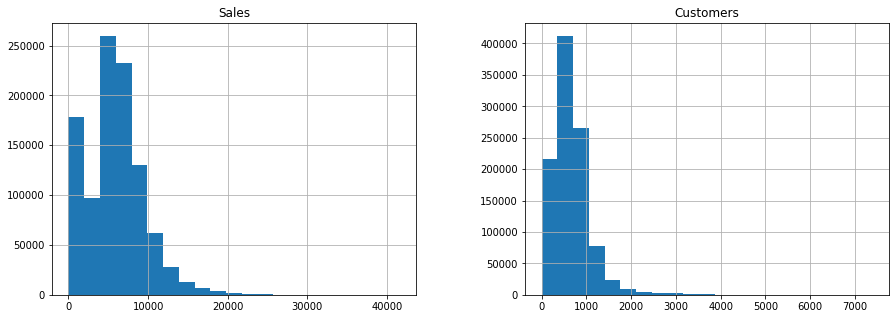

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=2)

merged_sales.hist(column='Sales', bins='sturges', ax=axes[0])
merged_sales.hist(column='Customers', bins='sturges', ax=axes[1])

fig.set_size_inches(15, 5)
plt.show()  

Histograms of our *Sales* and *Customers* values show us a positive skew and high kurtosis. 

---

Next we'll take a closer look at our statistics for our *Sales* column.

In [17]:
print("skew     " + str(round(merged_sales['Sales'].skew(),6)))
print("kurtosis " + str(round(merged_sales['Sales'].kurtosis(),6)))
print(merged_sales['Sales'].describe().round(3))
print("mode     " + str(merged_sales['Sales'].mode()))


skew     0.64146
kurtosis 1.778375
count    1017209.000
mean        5773.819
std         3849.926
min            0.000
25%         3727.000
50%         5744.000
75%         7856.000
max        41551.000
Name: Sales, dtype: float64
mode     0    0
dtype: int64


We can see our sales figures have a slightly positive **skew**, with the **mean** (5773.819) only slightly larger than the **median** (5744.000), suggesting most outliers are to the right of the mean. 

High **kurtosis** indicates it's leptokurtic with the likelihood of heavy tails and outliers that may be extreme. Considering our **min** and **max** values of 0 and 41,551 sales, we aren't surprised to see there may be some extreme outliers. 

The **max** value well above the **mean** of 5,773.819 and outside the **standard deviation** of 3849.926 helps us see how our mean ends up getting pulled slightly to the right for our positive **skew**. 

There is no **mode** as we don't have any stores recording the exact same number of sales on any days, which isn't surprising. 

---

<h1 style="background-color:#548984; color: #FFFFFF; padding: 15px;">8. Data cleaning</h1>

<h2 style="background-color:#6dbcc5; color: #FFFFFF; padding: 8px;">Datetime</h2>

First we'll convert our *Date* column to datetime for easier filtering later on.

With an .info() call we can confirm our Date column was successfully converted to datetime.

We'll also expand our Date column into separate Month, Day of Month, and Year columns for easier filtering.

In [18]:
merged_sales['Date'] = pd.to_datetime(merged_sales['Date'], format="%Y-%m-%d", errors='raise')


In [19]:
merged_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1014567 no

In [20]:
merged_sales["Year"] = merged_sales["Date"].dt.year
merged_sales["Month"] = merged_sales["Date"].dt.month
merged_sales["DayOfMonth"] = merged_sales["Date"].dt.day

---

<h2 style="background-color:#6dbcc5; color: #FFFFFF; padding: 8px;">Duplicates</h2>

We'll do a quick check for and delete any rows that are complete duplicates of another row, as we should only have one entry for each store and date.

In [21]:
print("Rows before dropping duplicates: " + str(merged_sales.shape[0]))
merged_sales = merged_sales.drop_duplicates()
print("Rows after dropping duplicates: " + str(merged_sales.shape[0]))

Rows before dropping duplicates: 1017209
Rows after dropping duplicates: 1017209


The length of our table remains the same, looks like no duplicate rows were found!

---

<h2 style="background-color:#6dbcc5; color: #FFFFFF; padding: 8px;">Text and Expected Values</h2>

Next we'll check our four columns that contain strings to make sure we have no inappropriately entered data. Using str.strip() to remove any accidental leading or trailing spaces.

In [22]:
for col in merged_sales:
    if merged_sales[col].dtype == object:
        merged_sales[col] = merged_sales[col].str.strip()

Next we'll look at value_counts for those columns and confirm only expected values are found. 

In [23]:
for col in merged_sales:
    if merged_sales[col].dtype == object:
        print(merged_sales[col].value_counts())

0    986159
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64
a    551627
d    312912
c    136840
b     15830
Name: StoreType, dtype: int64
a    537445
c    471470
b      8294
Name: Assortment, dtype: int64
Jan,Apr,Jul,Oct     293122
Feb,May,Aug,Nov     118596
Mar,Jun,Sept,Dec     97460
Name: PromoInterval, dtype: int64


Everything is looking as expected in our columns that contain text, and because each column only has 3-4 unique values we can see we don't need to worry about changing anything to lower, upper, or proper case. 

We'll also do a quick check of columns we expect to only have a few unique values or binary flags, such as DayOfWeek or Promo, to make sure there's nothing unexpected there.

In [24]:
check_cols = [ 'Open', 'Promo', 'Promo2', 'SchoolHoliday',  'DayOfWeek', 'CompetitionOpenSinceMonth',  'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear']

for col in check_cols:
    print(col)
    print(sorted(merged_sales[col].unique()))

Open
[0, 1]
Promo
[0, 1]
Promo2
[0, 1]
SchoolHoliday
[0, 1]
DayOfWeek
[1, 2, 3, 4, 5, 6, 7]
CompetitionOpenSinceMonth
[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, nan]
CompetitionOpenSinceYear
[1900.0, 1961.0, 1990.0, 1994.0, 1995.0, 1998.0, 1999.0, 2000.0, 2001.0, 2002.0, 2003.0, 2004.0, 2005.0, 2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0, nan]
Promo2SinceWeek
[nan, 1.0, 5.0, 6.0, 9.0, 10.0, 13.0, 14.0, 18.0, 22.0, 23.0, 26.0, 27.0, 28.0, 31.0, 35.0, 36.0, 37.0, 39.0, 40.0, 44.0, 45.0, 48.0, 49.0, 50.0]
Promo2SinceYear
[nan, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0]


We see the relevant binary flags, day of weeks, week, month, and year numeric values we expect. 

Because the *CompetitionOpenSinceMonth, CompetitionOpenSinceYear, Promo2SinceWeek, and Promo2SinceYear* columns are only using whole numbers and they are a discrete value, we will change them from floats to integers.



In [25]:
merged_sales['CompetitionOpenSinceMonth'] = merged_sales['CompetitionOpenSinceMonth'].convert_dtypes()
merged_sales['CompetitionOpenSinceYear'] = merged_sales['CompetitionOpenSinceYear'].convert_dtypes()
merged_sales['Promo2SinceWeek'] = merged_sales['Promo2SinceWeek'].convert_dtypes()
merged_sales['Promo2SinceYear'] = merged_sales['Promo2SinceYear'].convert_dtypes()

In [26]:
merged_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 21 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1014567 no

Now we can see that *CompetitionDistance*, our only continuous value, is our only column with floats.


---

<h2 style="background-color:#6dbcc5; color: #FFFFFF; padding: 8px;">Removing Rows and Columns</h2>

Below I look at entries for stores on days they were closed. 

For the purposes of our analysis I've chosen to drop these rows, as no sales are recorded on days stores are closed. The zero sales recorded for each of these rows lowers the average sales, and we can see this by comparing the mean *Sales* for all entries in our table to the mean *Sales* of only days that stores were open. If we filter for entries of stores that are closed we'll see a return of 172,817 rows, all of which record the expected 0 sales, lowering our mean *Sales* statistic. 


The potential information lost here is if we want to compare stores based on the number of days they are open or closed, but that is beyond the scope of our analysis for now. To avoid losing this information we will make a copy of our dataframe with only the days stores are open, to further be referred to as **sales**, rather than altering **merged_sales** in case we wish to access this data at a later time. 

In [27]:
## mean sales including entries for days stores are closed
merged_sales['Sales'].mean()

5773.818972305593

In [28]:
## mean sales for only days stores are open
merged_sales.loc[merged_sales['Open'] == 1, 'Sales'].mean()

6955.514290755952

In [29]:
## confirming all entries where the store is  marked as closed have 0 sales
merged_sales.loc[merged_sales["Open"] == 0, ['Sales', 'Customers']].value_counts()

Sales  Customers
0      0            172817
dtype: int64

In [30]:
## creating new sales dataframe with only entries for days stores are open
sales = merged_sales.drop(index=(merged_sales[merged_sales["Open"] == 0]).index, axis=1)

Now as we chose to delete any rows for days a store wasn't open, our *Open* column should only contain the value 1 now and is redundant, so we'll remove that. 

In [31]:
sales['Open'].value_counts()

1    844392
Name: Open, dtype: int64

In [32]:
sales.drop(columns=["Open"], inplace=True)

---

<h2 style="background-color:#6dbcc5; color: #FFFFFF; padding: 8px;">Outliers</h2>

Next we'll take a look at any outliers we may need to treat.

Sales                     AxesSubplot(0.125,0.536818;0.352273x0.343182)
Customers              AxesSubplot(0.547727,0.536818;0.352273x0.343182)
CompetitionDistance          AxesSubplot(0.125,0.125;0.352273x0.343182)
dtype: object

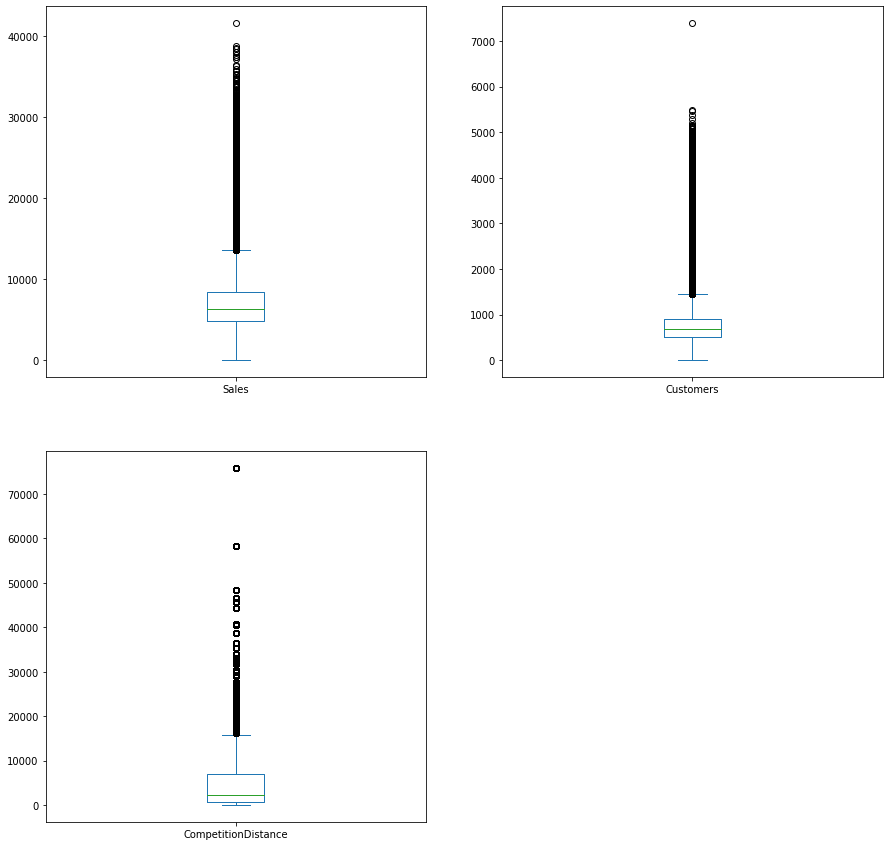

In [33]:
sales.plot(y=['Sales', 'Customers', 'CompetitionDistance'], 
           kind='box', subplots=True, layout=(2,2), figsize=(15,15))

From the box plots above we can see that *Sales, Customers,* and *CompetitionDistance* all appear to have significant outliers, so we'll explore further by calculating and investigating the outliers for each one. 



---

<h2 style="background-color:#6dbcc5; color: #FFFFFF; padding: 8px;">Sales Outliers</h2>

We will start with the *Sales* column.

In [34]:
def calculate_outlier(df,column): ## function for calculating outliers
    Q3 = df[column].quantile(0.75)
    Q1 = df[column].quantile(0.25)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    percent_outliers = round(((df[df[column] > upper].shape[0]) + (df[df[column] < lower].shape[0])) / df.shape[0] * 100, 2)
    return lower, upper, percent_outliers

In [35]:
col = 'Sales'
lower_sales, upper_sales, percent_outliers_sales = calculate_outlier(sales, col)

print("lower band = " + str(lower_sales))
print("upper band = " + str(upper_sales))
print("percentage of sales that are outliers = " + str(percent_outliers_sales) + "%")

lower band = -392.5
upper band = 13611.5
percentage of sales that are outliers = 3.64%


We know from our summary statistics that there aren't any sales below 0, so we'll just look at the upper outliers that we've calculated for the *Sales* column.

In [36]:
sales[sales[col] > upper_sales]

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,DayOfMonth
3,4,5,2015-07-31,13995,1498,1,0,1,c,c,620.0,9,2009,0,<NA>,<NA>,NaN,2015,7,31
6,7,5,2015-07-31,15344,1414,1,0,1,a,c,24000.0,4,2013,0,<NA>,<NA>,NaN,2015,7,31
23,24,5,2015-07-31,14190,1082,1,0,1,a,c,4590.0,3,2000,1,40,2011,"Jan,Apr,Jul,Oct",2015,7,31
24,25,5,2015-07-31,14180,1586,1,0,1,c,a,430.0,4,2003,0,<NA>,<NA>,NaN,2015,7,31
83,84,5,2015-07-31,14949,1439,1,0,1,a,c,11810.0,8,2014,0,<NA>,<NA>,NaN,2015,7,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015796,817,3,2013-01-02,25357,3462,0,0,1,a,a,140.0,3,2006,0,<NA>,<NA>,NaN,2013,1,2
1015821,842,3,2013-01-02,20355,1257,0,0,1,d,c,1200.0,11,2007,0,<NA>,<NA>,NaN,2013,1,2
1016012,1033,3,2013-01-02,13811,1408,0,0,1,a,a,7680.0,3,2006,0,<NA>,<NA>,NaN,2013,1,2
1016093,1114,3,2013-01-02,20642,3401,0,0,1,a,c,870.0,<NA>,<NA>,0,<NA>,<NA>,NaN,2013,1,2


While 30,769 is a lot of values, we can see from our calculte_outlier function that these outliers only account for 3.64% of all our sales values.

We'll look further to see if we see any trends with the outliers based on Month or Type of Store.

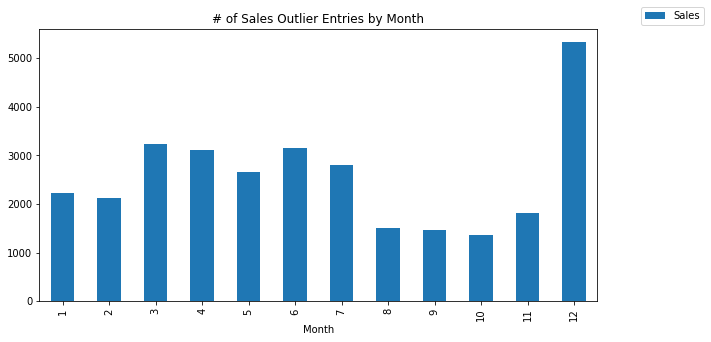

In [37]:
sales_outliers_by_month = pd.pivot_table((sales.loc[sales[col] > upper_sales]), index='Month', values='Sales', aggfunc='count')

sales_outliers_by_month.plot(y='Sales', kind='bar', figsize=(10,5), title="# of Sales Outlier Entries by Month")
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
plt.show()

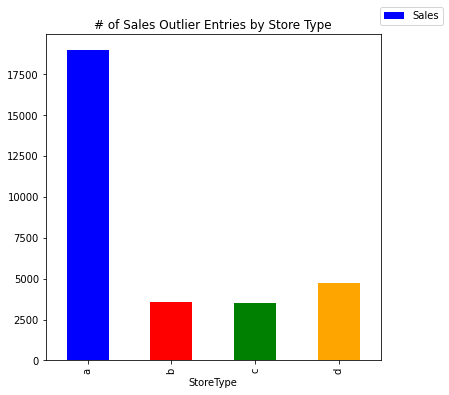

In [38]:
sales_outliers_by_stype = pd.pivot_table((sales.loc[sales[col] > upper_sales]), index='StoreType', values='Sales', aggfunc='count')

sales_outliers_by_stype.plot(y='Sales', kind='bar', figsize=(6,6), 
                             title="# of Sales Outlier Entries by Store Type", 
                             color=['blue','red','green','orange'])
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
plt.show()

When we look at the *Sales* outliers by month, we see the most represented month is December at 17.33%, which is unsurprising given the Christmas holidays. However, when we look at the outliers by *Store Type* we see that the 61.71% majority are coming from Type A stores, while Type B, C, D are more equally represented at 11-15%. This suggests that Type A stores may be the best performers in regards to outstanding sales days, and is worth looking into further. 

Below we will treat our *Sales* outliers by imputing them with our upper range value we calculated earlier, 13611.5, rounded up to 13612 as our *Sales* column is a measure of discrete values using whole numbers. As these outliers represent exceptionally high sales day, they are intended to be high numbers, but we would like to treat the outliers to limit their influence on any future modelling. As such imputing with our upper range value feels more appropriate than using our mean *Sales* value. 

We also save this a new dataframe going forward, to further be referenced to as **sales_treated**, so that we can preserve our **sales** dataframe with the outliers intact, should we wish to investigate them further.

In [39]:
sales_treated = sales.copy()

In [40]:
sales_treated.loc[sales_treated[col] > upper_sales, 'Sales'] = 13612

In [41]:
sales_treated[sales_treated['Sales'] > 13612] ## double-checking our imputation worked

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,DayOfMonth


---

<h2 style="background-color:#6dbcc5; color: #FFFFFF; padding: 8px;">Customer Outliers</h2>

Next we'll calculate and investigate our *Customer* outliers.

In [42]:
col = 'Customers'
lower_cust, upper_cust, percent_outliers_cust = calculate_outlier(sales_treated, col)

print(str(lower_cust) + ", " + str(upper_cust) +", " + str(percent_outliers_cust) + "%")

-42.0, 1454.0, 4.84%


Similar to *Sales*, we know from our summary statistics that we don't have any *Customer* values below 0, so we'll just look at our upper range value.

In [43]:
sales_treated[sales_treated['Customers'] > upper_cust]

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,DayOfMonth
3,4,5,2015-07-31,13612,1498,1,0,1,c,c,620.0,9,2009,0,<NA>,<NA>,NaN,2015,7,31
24,25,5,2015-07-31,13612,1586,1,0,1,c,a,430.0,4,2003,0,<NA>,<NA>,NaN,2015,7,31
124,125,5,2015-07-31,13612,2041,1,0,1,a,a,760.0,12,2005,0,<NA>,<NA>,NaN,2015,7,31
210,211,5,2015-07-31,13612,1659,1,0,1,a,c,350.0,11,2006,0,<NA>,<NA>,NaN,2015,7,31
250,251,5,2015-07-31,13612,2508,1,0,1,a,c,340.0,<NA>,<NA>,0,<NA>,<NA>,NaN,2015,7,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016093,1114,3,2013-01-02,13612,3401,0,0,1,a,c,870.0,<NA>,<NA>,0,<NA>,<NA>,NaN,2013,1,2
1016356,262,2,2013-01-01,13612,2875,0,a,1,b,a,1180.0,5,2013,0,<NA>,<NA>,NaN,2013,1,1
1016517,423,2,2013-01-01,9643,1751,0,a,1,b,a,1270.0,5,2014,0,<NA>,<NA>,NaN,2013,1,1
1016656,562,2,2013-01-01,8498,1675,0,a,1,b,c,1210.0,<NA>,<NA>,0,<NA>,<NA>,NaN,2013,1,1


We Can see right away that several of these entries have a *Sales* value of 13,612, which we know to be our newly imputed upper range value for *Sales* outliers. We expect a high correlation between *Customers* driving *Sales*, so we'll check to see how much crossover we have between our *Sales* and *Customers* outliers. 

In [44]:
sales_treated[(sales_treated['Customers'] > upper_cust) & (sales_treated['Sales'] == 13612)]

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,DayOfMonth
3,4,5,2015-07-31,13612,1498,1,0,1,c,c,620.0,9,2009,0,<NA>,<NA>,NaN,2015,7,31
24,25,5,2015-07-31,13612,1586,1,0,1,c,a,430.0,4,2003,0,<NA>,<NA>,NaN,2015,7,31
124,125,5,2015-07-31,13612,2041,1,0,1,a,a,760.0,12,2005,0,<NA>,<NA>,NaN,2015,7,31
210,211,5,2015-07-31,13612,1659,1,0,1,a,c,350.0,11,2006,0,<NA>,<NA>,NaN,2015,7,31
250,251,5,2015-07-31,13612,2508,1,0,1,a,c,340.0,<NA>,<NA>,0,<NA>,<NA>,NaN,2015,7,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015735,756,3,2013-01-02,13612,2465,0,0,1,a,c,50.0,<NA>,<NA>,1,40,2011,"Jan,Apr,Jul,Oct",2013,1,2
1015767,788,3,2013-01-02,13612,1791,0,0,1,a,c,1530.0,3,2013,0,<NA>,<NA>,NaN,2013,1,2
1015796,817,3,2013-01-02,13612,3462,0,0,1,a,a,140.0,3,2006,0,<NA>,<NA>,NaN,2013,1,2
1016093,1114,3,2013-01-02,13612,3401,0,0,1,a,c,870.0,<NA>,<NA>,0,<NA>,<NA>,NaN,2013,1,2


We can see a crossover of 21,420 rows, or approximately 52% of our *Customer* outlier entries are also *Sales* outlier entries.

We will also investigate how these *Customer* outliers break down by *Month* and *StoreType* just as we did with our *Sales* outliers. 

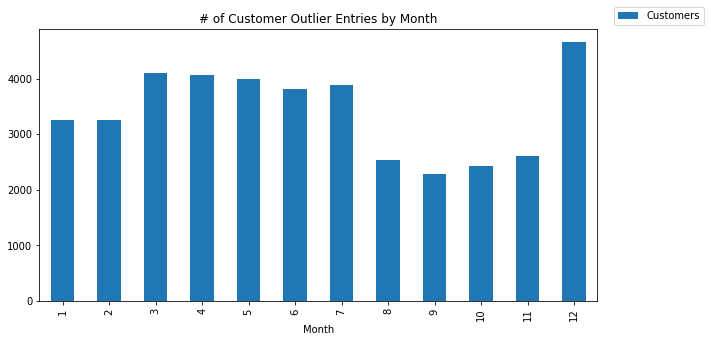

In [45]:
cust_outliers_by_month = pd.pivot_table((sales_treated.loc[sales_treated[col] > upper_cust]), index='Month', values='Customers', aggfunc='count')

cust_outliers_by_month.plot(y='Customers', kind='bar', figsize=(10,5), title="# of Customer Outlier Entries by Month")
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
plt.show()

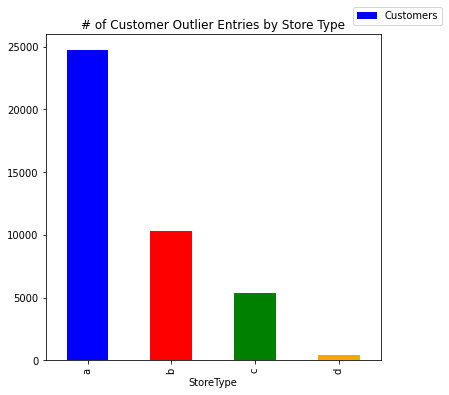

In [46]:
cust_outliers_by_stype = pd.pivot_table((sales_treated.loc[sales_treated[col] > upper_cust]), index='StoreType', values='Customers', aggfunc='count')

cust_outliers_by_stype.plot(y='Customers', kind='bar', figsize=(6,6), 
                             title="# of Customer Outlier Entries by Store Type", 
                             color=['blue','red','green','orange'])
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
plt.show()

December is our most represented month for *Customer* outliers, similar to our *Sales* outliers, but it's percentage of outliers is less than we saw with our *Sales*. 

We also see store Type A with the strongest showing when we break down the outliers by store type. Much like the *Sales* outliers Type A stores represent a strong 60%+ of the outliers. Surprisingly, Type D stores represent a tiny 1.02% of these *Customer* outliers, where as they represented the second largest percentage of *Sales* outliers at 15.29%. Further investigation into the number of items bought (*Sales*) per transaction (*Customer*) may prove insightful. 

Similar to our *Sales* outliers, we will also limit our *Customer* outliers to our calculated upper range, by imputing them to 1,454, so as to limit their influence but also indicate that they're meant to be high numbers.

In [47]:
sales_treated.loc[sales_treated['Customers'] > upper_cust, 'Customers'] = 1454

In [48]:
sales_treated.loc[sales_treated['Customers'] > upper_cust, 'Customers']

Series([], Name: Customers, dtype: int64)

For the sake of brevity and the purpose of this assignment, we will leave the CompetitionDistance outliers untreated for now, as we won't be using them to answer the remaining questions asked of this assignment.


---

<h2 style="background-color:#6dbcc5; color: #FFFFFF; padding: 8px;">Missing Values</h2>

Next we'll take a look at missing values. We'll start by assessing how many we have and where.

In [49]:
sales_treated.isna().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2186
CompetitionOpenSinceMonth    268619
CompetitionOpenSinceYear     268619
Promo2                            0
Promo2SinceWeek              423307
Promo2SinceYear              423307
PromoInterval                423307
Year                              0
Month                             0
DayOfMonth                        0
dtype: int64

In [50]:
(sales_treated.isna().sum() * 100 / sales_treated.shape[0]).round(2)   ## missing values as a % of all values in the column

Store                         0.00
DayOfWeek                     0.00
Date                          0.00
Sales                         0.00
Customers                     0.00
Promo                         0.00
StateHoliday                  0.00
SchoolHoliday                 0.00
StoreType                     0.00
Assortment                    0.00
CompetitionDistance           0.26
CompetitionOpenSinceMonth    31.81
CompetitionOpenSinceYear     31.81
Promo2                        0.00
Promo2SinceWeek              50.13
Promo2SinceYear              50.13
PromoInterval                50.13
Year                          0.00
Month                         0.00
DayOfMonth                    0.00
dtype: float64

While we see a rather high 50% missing values rate for *Promo2SinceWeek* and *Promo2SinceYear* we can check and see if these all just correspond to stores that aren't running Promo2, and hence would not be expected to have valid data for these columns.

In [51]:
print(sales_treated[sales_treated['Promo2'] == 0].shape[0])
print(sales_treated['Promo2SinceWeek'].isna().sum())
print(sales_treated['Promo2SinceYear'].isna().sum())

423307
423307
423307


As the number of entries with missing *Promo2SinceWeek* and *Promo2SinceYear* values corresponds with the number of entries where the store isn't participating in Promo2, we can rest assured that the lack of data here is appropriate. 


---

The other area we see missing data is in relation to competition stores, mostly in the two columns relating when the nearest competitor store opened, and to much lesser extent in *CompetitionDistance*


The *CompetitionDistance* values may be used for analyzing how stores perform based on how close their competition is, and as such missing values could skew such analysis. 0 would be an inappropriate replacement for these null values as it would indicate that the competition stores are incredibly close. As such we'll look to replace these missing values with the mean *CompetitionDistance* based on the *StoreType*.

In [52]:
mean_type_a = round(stores_lookup.loc[(stores_lookup['StoreType'] == 'a'), 'CompetitionDistance'].mean(), 1)
mean_type_b = round(stores_lookup.loc[(stores_lookup['StoreType'] == 'b'), 'CompetitionDistance'].mean(), 1)
mean_type_c = round(stores_lookup.loc[(stores_lookup['StoreType'] == 'c'), 'CompetitionDistance'].mean(), 1)
mean_type_d = round(stores_lookup.loc[(stores_lookup['StoreType'] == 'd'), 'CompetitionDistance'].mean(), 1)

print("The mean Compeition Distance for stores of type A is " + str(mean_type_a))
print("The mean Compeition Distance for stores of type B is " + str(mean_type_b))
print("The mean Compeition Distance for stores of type C is " + str(mean_type_c))
print("The mean Compeition Distance for stores of type D is " + str(mean_type_d))


The mean Compeition Distance for stores of type A is 5123.1
The mean Compeition Distance for stores of type B is 1060.6
The mean Compeition Distance for stores of type C is 3522.6
The mean Compeition Distance for stores of type D is 6913.1


In [53]:
sales_treated.loc[sales_treated['StoreType'] == 'a'] = sales_treated.loc[sales_treated['StoreType'] == 'a'].fillna(value={"CompetitionDistance" : mean_type_a})
sales_treated.loc[sales_treated['StoreType'] == 'b'] = sales_treated.loc[sales_treated['StoreType'] == 'b'].fillna(value={"CompetitionDistance" : mean_type_b}) 
sales_treated.loc[sales_treated['StoreType'] == 'c'] = sales_treated.loc[sales_treated['StoreType'] == 'c'].fillna(value={"CompetitionDistance" : mean_type_c}) 
sales_treated.loc[sales_treated['StoreType'] == 'd'] = sales_treated.loc[sales_treated['StoreType'] == 'd'].fillna(value={"CompetitionDistance" : mean_type_d}) 

In [54]:
sales_treated.isna().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance               0
CompetitionOpenSinceMonth    268619
CompetitionOpenSinceYear     268619
Promo2                            0
Promo2SinceWeek              423307
Promo2SinceYear              423307
PromoInterval                423307
Year                              0
Month                             0
DayOfMonth                        0
dtype: int64

Next we will replace the null values in our *PromoInterval* column. As this column contains strings listing the months the Promo2 starts anew, we will replace the missing values with a string 'NA' for Not Applicable. 

In [55]:
sales_treated.loc[sales_treated['PromoInterval'].isna(), 'PromoInterval'] = "NA"

In [56]:
sales_treated['PromoInterval'].value_counts()

NA                  423307
Jan,Apr,Jul,Oct     242411
Feb,May,Aug,Nov      98005
Mar,Jun,Sept,Dec     80669
Name: PromoInterval, dtype: int64

For the missing values in *'CompetitionOpenSinceYear'* & *'Promo2SinceYear'* it would be inappropriate to replace them with zeros, as further calculations with the years in that column could lead to values suggesting a competition store has been open 2022 years. As such, we'll impute these missing values with the current year, so if calculations are done to find how long the nearest competition store has been open since these instances of no competition store nearby will return zero years. 

In the same manner we will impute the missing values in *'CompetitionOpenSinceMonth'* with the current month, and *'Promo2SinceWeek'* with the current week.

In [57]:
sales_treated.loc[sales_treated['CompetitionOpenSinceYear'].isna(), 'CompetitionOpenSinceYear'] = dt.datetime.now().year

sales_treated.loc[sales_treated['Promo2SinceYear'].isna(), 'Promo2SinceYear'] = dt.datetime.now().year

sales_treated.loc[sales_treated['CompetitionOpenSinceMonth'].isna(), 'CompetitionOpenSinceMonth'] = dt.datetime.now().month

sales_treated.loc[sales_treated['Promo2SinceWeek'].isna(), 'Promo2SinceWeek'] = dt.datetime.now().isocalendar()[1]

Now we'll double check our count of missing values again to confirm our changes worked.

In [58]:
sales_treated.isna().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
Year                         0
Month                        0
DayOfMonth                   0
dtype: int64

---

<h2 style="background-color:#6dbcc5; color: #FFFFFF; padding: 8px;">Adding an UPT Column</h2>

Based on our investigation of *Sales* and *Costumers* outliers, particularly how they're represented by different store types, I thought it would be worthwhile to add a calculated column to give us some insight into the relationship between *Customers* and *Sales* for each store and day.

In [59]:
(sales_treated['Customers'] >= sales_treated['Sales']).value_counts()

False    844338
True         54
dtype: int64

We can see that for almost all entries we have in our dataframe, the number of *Sales* at a given store is greater than the number of *Customers*. Suggesting that the *Customers* value is derived by how many transactions there are at a store, and the *Sales* value is indicative of how many individual items are sold. Thus we can calculate the average number of items sold for each transaction as Units Per Transaction (UPT). 

First we'll quickly investigate the 54 rows where there aren't more *Sales* than *Customers*.

In [60]:
sales_treated[sales_treated['Customers'] >= sales_treated['Sales']]

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,DayOfMonth
86825,971,5,2015-05-15,0,0,0,0,1,c,a,1140.0,5,2011,1,14,2012,"Mar,Jun,Sept,Dec",2015,5,15
142278,674,4,2015-03-26,0,0,0,0,0,a,a,2640.0,12,2005,1,31,2013,"Feb,May,Aug,Nov",2015,3,26
196938,699,4,2015-02-05,0,0,1,0,0,a,a,180.0,11,2022,1,5,2013,"Jan,Apr,Jul,Oct",2015,2,5
322053,708,3,2014-10-01,0,0,1,0,0,c,c,11470.0,10,2009,1,18,2014,"Jan,Apr,Jul,Oct",2014,10,1
330176,357,1,2014-09-22,0,0,0,0,0,a,a,2060.0,10,2008,0,45,2022,NA,2014,9,22
340348,227,4,2014-09-11,0,0,0,0,0,a,a,2370.0,11,2022,0,45,2022,NA,2014,9,11
340860,835,4,2014-09-11,0,0,0,0,0,a,a,2890.0,12,2007,1,10,2014,"Mar,Jun,Sept,Dec",2014,9,11
341795,835,3,2014-09-10,0,0,0,0,0,a,a,2890.0,12,2007,1,10,2014,"Mar,Jun,Sept,Dec",2014,9,10
346232,548,5,2014-09-05,0,0,1,0,1,d,c,3760.0,2,2009,0,45,2022,NA,2014,9,5
346734,28,4,2014-09-04,0,0,1,0,0,a,a,1200.0,10,2014,1,6,2015,"Mar,Jun,Sept,Dec",2014,9,4


We can see the majority of these days are entries with both zero *Sales* and zero *Customers* recorded. This seems odd for a day that the store is open. A quick check of **merged_sales**, which still has the *Open* column, gives us the same results and assures us that the stores are indeed marked as open on these days.



```
merged_sales[(merged_sales['Customers'] >= merged_sales['Sales']) & merged_sales['Open'] == 1]
```

I can only speculate as to why we have entries for stores that are open but aren't recording any sales, perhaps a stocktake day? Let's also look at the cases that aren't zero *Sales* and zero *Customers*.

In [61]:
sales_treated[sales_treated['Customers'] > sales_treated['Sales']]

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,DayOfMonth
478649,1100,2,2014-04-29,0,3,1,0,0,a,a,540.0,11,2022,1,14,2011,"Jan,Apr,Jul,Oct",2014,4,29
889932,948,4,2013-04-25,0,5,1,0,0,b,b,1430.0,11,2022,0,45,2022,NA,2013,4,25


I'm unsure of why we have two days with zero *Sales* and a small handful of *Customers*. As I have no explanation for these 2 days, nor the 52 other open days with zero *Sales* and *Customers*, I don't feel comfortable deleting them. 

This does pose a small problem for calculating our average UPT, however. As such we will create our UPT column by dividing the day's *Sales* by the days *Customers* to find the average Units Per Transaction for each day and store. The resulting 52 null values will be imputed with a zero to reflect the zero *Sales* for those entries.

In [62]:
sales_treated['UPT'] = sales_treated['Sales'] / sales_treated['Customers']

In [63]:
sales_treated['UPT'].isna().sum()

52

In [64]:
sales_treated.loc[sales_treated['UPT'].isna(), 'UPT'] = 0

In [65]:
sales_treated['UPT'].isna().sum()

0

We'll also add this *UPT* column to our **sales** table which still contains our *Sales* and *Customers* outliers, so we can explore the *UPT* with the outliers as well.

In [66]:
sales['UPT'] = sales['Sales'] / sales['Customers']
sales.loc[sales['UPT'].isna(), 'UPT'] = 0

---

<h2 style="background-color:#6dbcc5; color: #FFFFFF; padding: 8px;">Review of Summary Statistics Post Cleaning</h2>

Let's quickly review some of our summary statistics now that we've cleaned our data a bit. We can look at the summary statistics for **sales** to see them as they were before treating outliers and imputing for missing data, and compare them to the **sales_treated** summary statistics to see how they've changed.

In [67]:
merged_sales[['Sales', 'Customers', 'CompetitionDistance']].describe() ## BEFORE cleaning

,Sales,Customers,CompetitionDistance
count,1.017209e+06,1.017209e+06,1.014567e+06
mean,5.773819e+03,6.331459e+02,5.430086e+03
std,3.849926e+03,4.644117e+02,7.715324e+03
min,0.000000e+00,0.000000e+00,2.000000e+01
25%,3.727000e+03,4.050000e+02,7.100000e+02
50%,5.744000e+03,6.090000e+02,2.330000e+03
75%,7.856000e+03,8.370000e+02,6.890000e+03
max,4.155100e+04,7.388000e+03,7.586000e+04


In [68]:
sales_treated[['Sales', 'Customers', 'CompetitionDistance', 'UPT']].describe() ## AFTER cleaning

,Sales,Customers,CompetitionDistance,UPT
count,844392.000000,844392.000000,844392.000000,844392.000000
mean,6840.659923,734.787972,5460.084731,9.535935
std,2717.364981,296.171183,7799.553804,2.103304
min,0.000000,0.000000,20.000000,0.000000
25%,4859.000000,519.000000,710.000000,7.996429
50%,6369.000000,676.000000,2330.000000,9.361761
75%,8360.000000,893.000000,6900.000000,10.864260
max,13612.000000,1454.000000,75860.000000,52.153257


We can see that the cleaning has narrowed our standard deviation for *Sales* and *Customers*, as well as raising the mean after removing the entries for closed stores.

In [69]:
merged_sales[['Sales', 'Customers', 'CompetitionDistance']].skew() ## BEFORE cleaning

Sales                  0.641460
Customers              1.598650
CompetitionDistance    2.928534
dtype: float64

In [70]:
sales_treated[['Sales', 'Customers', 'CompetitionDistance', 'UPT']].skew() ## AFTER cleaning

Sales                  0.717438
Customers              0.803485
CompetitionDistance    2.977905
UPT                    0.560278
dtype: float64

In [71]:
merged_sales[['Sales', 'Customers', 'CompetitionDistance']].kurtosis() ## BEFORE cleaning

Sales                   1.778375
Customers               7.091773
CompetitionDistance    13.000022
dtype: float64

In [72]:
sales_treated[['Sales', 'Customers', 'CompetitionDistance', 'UPT']].kurtosis() ## AFTER cleaning

Sales                   0.057682
Customers               0.102116
CompetitionDistance    13.450813
UPT                     1.124173
dtype: float64

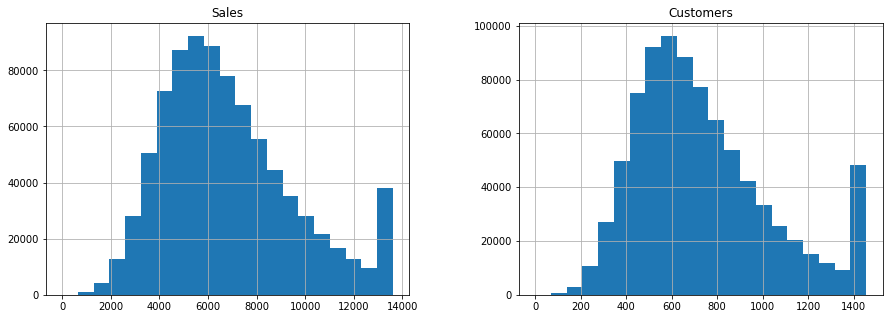

In [73]:
fig, axes = plt.subplots(nrows=1, ncols=2)

sales_treated.hist(column='Sales', bins='sturges', ax=axes[0])
sales_treated.hist(column='Customers', bins='sturges', ax=axes[1])
fig.set_size_inches(15, 5)
plt.show()

Histograms of our *Sales* and *Customers* values shows us a slight positive skew, which changed a little after our cleaning, and we see a more significant change in kurtosis being lowered. We also see the effect of imputing our outliers with our upper range limit on the right side of either histogram. 

Using Sturges' Rule to calculate our bin size, as we did with our pre-data cleaning histograms, we now get results that are looking far closer to a standard normalization. 


---

<h1 style="background-color:#548984; color: #FFFFFF; padding: 15px;">9.  Exploratory Insights</h1>

Let's explore how stores perform in *Sales* by month, based on *Assortment* type. We know that *Assortment* type A offers a "basic" assortment of merchandise, Type B offers and "extra" assortment, and type C offers an "extended" assortment.

Because our data ranges from Jan. 1, 2013 - July 31, 2015, we will exclude the 2015 data for now so as we are only looking at a complete years' worth of numbers.

In [74]:
assortment_pivot_total_sales = pd.pivot_table((sales_treated[sales_treated['Year'] < 2015]), ## Excluding 2015 data
               index='Month', values='Sales', columns='Assortment', aggfunc=np.sum)
assortment_pivot_total_sales

Assortment,a,b,c
Month,,,
1,188100262,3754636,171893846
2,178031925,3710558,164191126
3,198172555,4173361,185276735
4,191177863,4233401,176759688
5,191082283,4691504,178547553
6,185757989,4503724,174429599
7,188440724,4338877,184388970
8,175000464,4111225,178291640
9,168298236,4127263,165868274


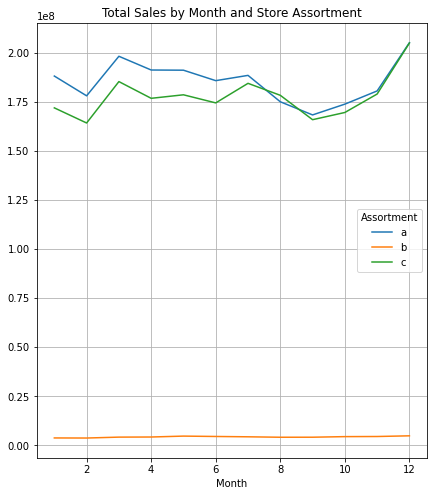

In [75]:
assortment_pivot_total_sales.plot(kind='line', title='Total Sales by Month and Store Assortment', figsize=(7,8), grid=True)
plt.show()

A quick look at *Sales* by volume of total sales shows that stores of *Assortment* types A and C have significantly more volume than type B stores. Type B stores stay fairly consistent in total *Sales* volume across all months, with minor upticks during mid-year and end year. Type A and C stores can be seen to follow very similar trends in terms of *Sales* volume.

A quick look at how many stores we have of each *Assortment* type will show us significantly less stores of Assortment type B, which accounts for the significantly lower volume of *Sales*.

In [76]:
pd.pivot_table((sales_treated[sales_treated['Year'] < 2015]), index='Assortment', values='Store', aggfunc='count')

,Store
Assortment,
a,340968
b,6304
c,301088


Due to the vast differences in total *Sales* volume based on *Assortment* type, lets also look at the average number of *Sales*.

(Note: We could include our 2015 data since we're calculating the mean *Sales* now, but for the sake of consistency when comparing it with the total *Sales* we will continue to use the same 2013-2014 data.)

In [77]:
assortment_pivot_avg_sales = pd.pivot_table((sales_treated[sales_treated['Year'] < 2015]), index='Month', values='Sales', columns='Assortment', aggfunc=np.mean)
assortment_pivot_avg_sales

Assortment,a,b,c
Month,,,
1,6136.639110,6940.177449,6514.338348
2,6256.393204,7603.602459,6692.936817
3,6559.181644,7979.657744,7081.361222
4,6569.460259,8048.290875,7021.796687
5,6654.673086,8407.713262,7155.927738
6,6484.604796,8340.229630,6986.406016
7,6539.447668,8233.163188,7076.641465
8,6180.267834,7801.185958,6972.688307
9,6176.988769,8092.672549,6749.746643


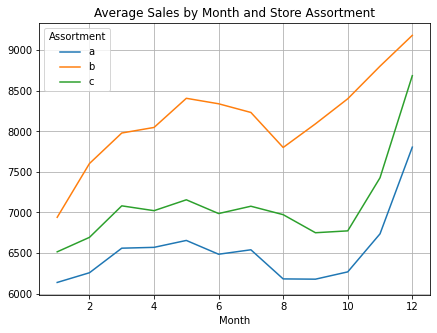

In [78]:
assortment_pivot_avg_sales.plot(kind='line', title='Average Sales by Month and Store Assortment', figsize=(7,5), grid=True)
plt.show()

Look at average *Sales* by store *Assortment* type we can see that stores of type B actually perform quite well when compared to types A and C, despite there being significantly less type B stores! Types A and C continue to follow very similar trends for *Sales*, but Type C stores consistently outperform type A stores. 

Let's also take a look at how our UPT metric compares across stores of different *Assortment* types.

(Note: Because we included a UPT metric for our table that still has our extremely high *Sales* outliers, we will plot that too, to compare.)

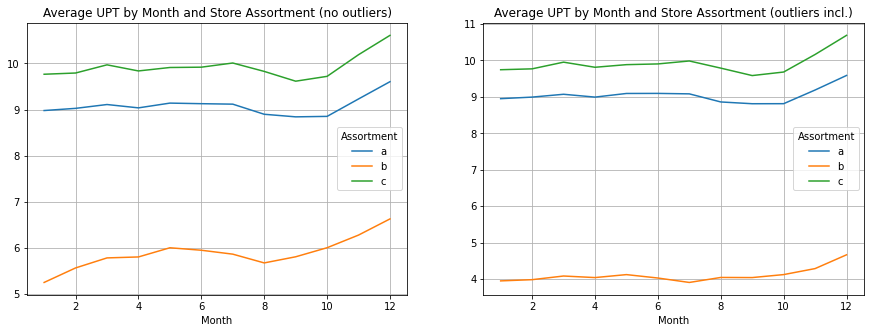

In [79]:
assortment_pivot_avg_UPT = pd.pivot_table((sales_treated[sales_treated['Year'] < 2015]), 
                                     index='Month', values='UPT', columns='Assortment', aggfunc=np.mean)
assortment_pivot_avg_UPT_outliers = pd.pivot_table((sales[sales['Year'] < 2015]), 
                                     index='Month', values='UPT', columns='Assortment', aggfunc=np.mean)

fig, axes = plt.subplots(nrows=1, ncols=2)

assortment_pivot_avg_UPT.plot(kind='line', title='Average UPT by Month and Store Assortment (no outliers)', figsize=(7,5), grid=True, ax=axes[0])
assortment_pivot_avg_UPT_outliers.plot(kind='line', title='Average UPT by Month and Store Assortment (outliers incl.)', figsize=(7,5), grid=True, ax=axes[1])
fig.set_size_inches(15, 5)
plt.show()

We can see stores of *Assortment* type C are our best performers for UPT. Comparing UPT with and without outliers treated, we can see that with the outliers treated we can more clearly see upward and downward trends, whereas with outliers included these trends look less impactful. 

---

Exploring out *Sales* and *Customers* outliers prompted us to create out UPT metric when comparing them by *StoreType*, so let's explore *Sales* and *UPT* by month and *StoreType* as well. 

Let's start with a look at how many stores of each *StoreType* we have.

In [80]:
pd.pivot_table((sales_treated[sales_treated['Year'] < 2015]), index='StoreType', values='Store', aggfunc='count')

,Store
StoreType,
a,351476
b,11959
c,87079
d,197846


Next let's look at average *Sales* per month, broken down by *StoreType*.

In [81]:
stype_pivot_avg_sales = pd.pivot_table((sales_treated[sales_treated['Year'] < 2015]), ## Excluding 2015 data
               index='Month', values='Sales', columns='StoreType', aggfunc=np.mean)
stype_pivot_avg_sales

StoreType,a,b,c,d
Month,,,,
1,6340.939457,8336.488072,6325.695836,6159.515050
2,6481.948327,8839.864537,6476.370302,6314.299544
3,6781.173209,9106.575911,6847.562350,6723.579013
4,6794.130360,9133.661885,6779.331581,6657.805468
5,6840.385002,9350.734115,6917.847151,6857.707885
6,6695.761585,9321.768687,6667.874042,6677.662636
7,6810.202874,9081.286555,6711.115334,6709.382984
8,6533.024121,8773.740958,6575.015995,6491.047891
9,6451.144734,8957.519192,6428.605156,6348.017432


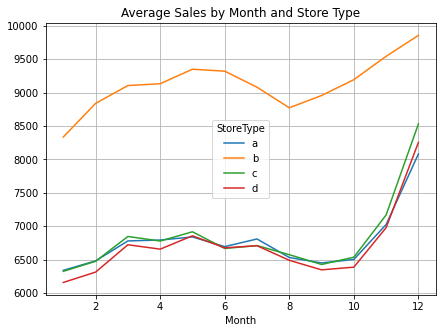

In [82]:
stype_pivot_avg_sales.plot(kind='line', title='Average Sales by Month and Store Type', figsize=(7,5), grid=True)
plt.show()

We can see that stores of type A, C, and D closely follow very similar trends, whereas stores of type B significantly outperform them when it comes to the average number of *Sales*.

Now let's see how UPT compares across Store Types.

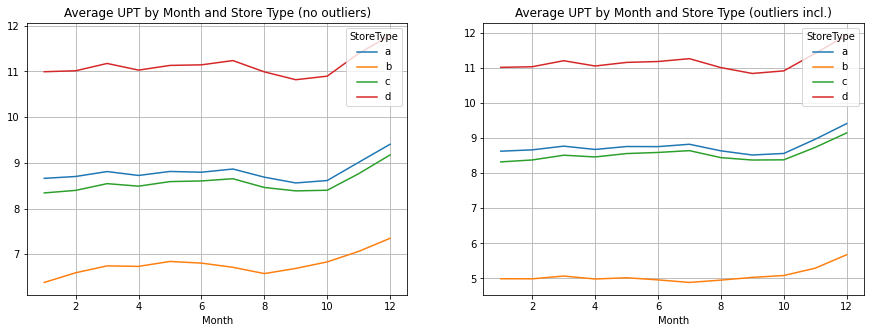

In [83]:
stype_pivot_avg_UPT = pd.pivot_table((sales_treated[sales_treated['Year'] < 2015]), 
                                     index='Month', values='UPT', columns='StoreType', aggfunc=np.mean)
stype_pivot_avg_UPT_outliers = pd.pivot_table((sales[sales['Year'] < 2015]), 
                                     index='Month', values='UPT', columns='StoreType', aggfunc=np.mean)

fig, axes = plt.subplots(nrows=1, ncols=2)

stype_pivot_avg_UPT.plot(kind='line', title='Average UPT by Month and Store Type (no outliers)', figsize=(7,5), grid=True, ax=axes[0])
stype_pivot_avg_UPT_outliers.plot(kind='line', title='Average UPT by Month and Store Type (outliers incl.)', figsize=(7,5), grid=True, ax=axes[1])
fig.set_size_inches(15, 5)
plt.show()

Similar to our look at UPT across stores of different Assortment types, we can see that treating the outliers leaves us with a graph that more clearly shows changes in the trend of monthly sales. As we look at average *UPT* by *StoreType*, we see that while they follow similar trends, store of *StoreType* D see customers purchasing approximately 3 more items per purchase on average than at a type A or C store, and approximately 6 more items per purchase on average than customers at type B stores. 


It seems customers of type B stores buy less items per purchase on average, but overall type B stores see more sales. It would reason that type B stores must see more customers on average to account for high average sales. 

Below we look at total customers and average customers by month. We know of the different store types that there are the fewest stores of type B, so we aren't surprised to see them at the bottom of the Total Customers chart. However, if we look at average customers by store type we see that they average far more customers than the other store types.

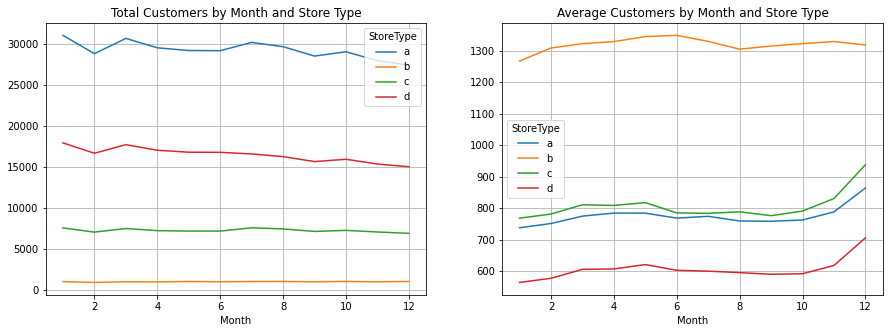

In [84]:
stype_pivot_total_cust = pd.pivot_table((sales_treated[sales_treated['Year'] < 2015]), index='Month', columns='StoreType', values='Customers', aggfunc='count')
stype_pivot_avg_cust = pd.pivot_table((sales_treated[sales_treated['Year'] < 2015]), index='Month', columns='StoreType', values='Customers', aggfunc=np.mean)

fig, axes = plt.subplots(nrows=1, ncols=2)

stype_pivot_total_cust.plot(kind='line', title='Total Customers by Month and Store Type', figsize=(7,5), grid=True, ax=axes[0])
stype_pivot_avg_cust.plot(kind='line', title='Average Customers by Month and Store Type', figsize=(7,5), grid=True, ax=axes[1])
fig.set_size_inches(15, 5)
plt.show()

To understand a bit more about our different *Store Types*, let's also quickly see how they compare in relation to the *Competition Distance*.

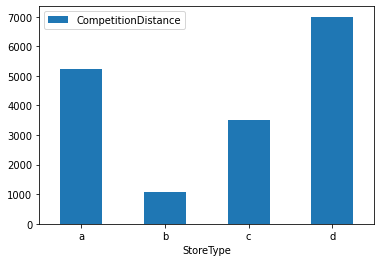

In [85]:
stype_pivot_avg_compdist = pd.pivot_table((sales_treated[sales_treated['Year'] < 2015]),
                                         index='StoreType', values='CompetitionDistance', aggfunc=np.mean)

stype_pivot_avg_compdist.plot(kind='bar', rot=0)
plt.show()

Stores of *Store Type* B are significantly closer to their nearest competitor store, on average. This might suggest the Type B stores are most often in dense urban shopping areas. Perhaps with many other stores available in closer proximity, customers are less likely but multiple items at the store when they can more easily purchase additional items at other nearby stores. Let's see if there's any correlation between *CompetitionDistance* and *UPT*.

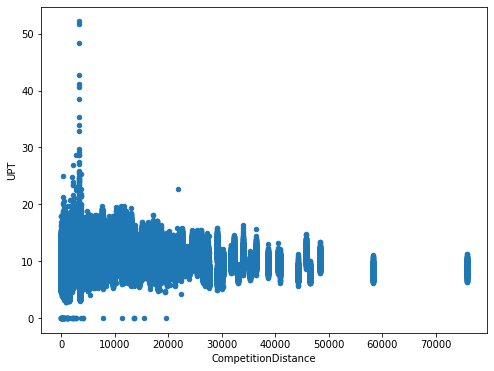

In [86]:
sales_treated.plot(x='CompetitionDistance', y='UPT', kind='scatter', figsize=(8,6))
plt.show()

We don't see a strong positive or negative correlation between *CompetitionDistance* and *UPT* on our scatter plot, but we do see what look to be outliers in our UPT metric.

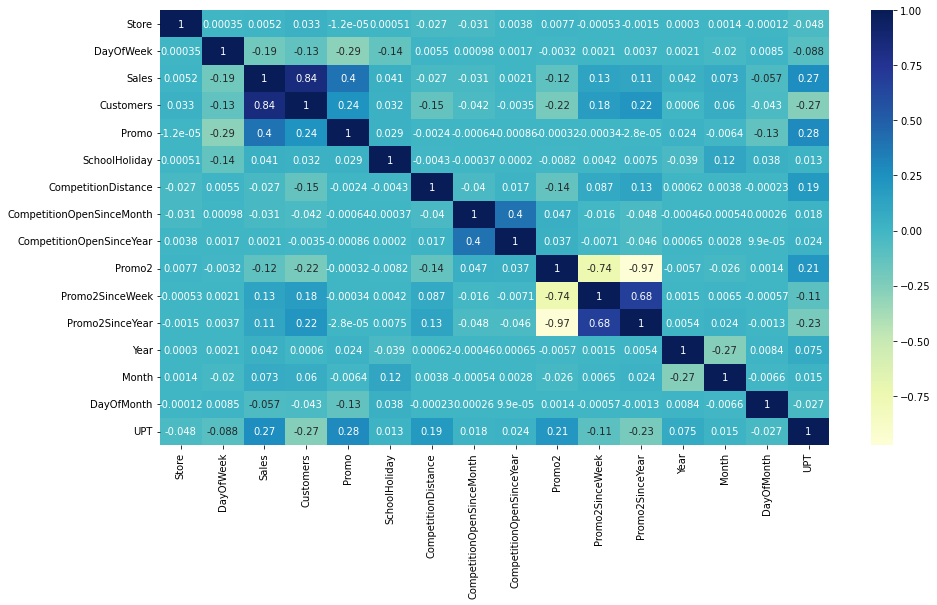

In [87]:
corr = sales_treated.corr()

plt.figure(figsize = (15,8))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, center=0, cmap="YlGnBu", annot=True)
plt.show()

Looking at the correlation calculations above we don't see any meaningful correlations with *CompetitionDistance*. The notable correlations are a strong positive correlation between *Customers* and *Sales*, which isn't surprising. In addition, we see a smaller but positive correlation between *Promo* and *Sales*.

---

<h1 style="background-color:#548984; color: #FFFFFF; padding: 15px;">10. Conclusion</h1>

When looking at key performance indicators across store **Assortments** and **Store Types** we see they follow similar monthly trends, but numbers can vary by Assortment and Store Type.

When looking at store **Assortment** we found that stores of Assortment Type B represent a small share of total sales, which isn’t surprising considering less than 1% of stores are of the Type B assortment. However, when looking at average monthly sales we see the Assortment Type B stores out performing types A and C by a large margin. Looking at the number of units sold per transaction, UPT, we see Assortment Type A and C stores performing better than Type B.

A similar investigation into sales by **Store Type** also saw noticeable differences between Store Type B and Store Types A, C, and D. Again, Type B is the least common Store Type, representing only 1.8% of stores sampled from 2013-2014. And yet, similar to Assortment Type B, Store Type B also vastly outperforms other Store Types when looking at average monthly sales. Following the similarities, it also lags to the bottom when we compare UPT amongst Store Types. 

In trying to further investigate that difference between average sales and average UPT for Store Type B, we looked at average customers by Store Type and found Type B to be well ahead of the others. This suggests that Type B stores on average have more customers visit, but they buy a smaller number of items. In looking at the average distance of the nearest competitor by store type we found that Type B stores were far closer to their nearest competitor store on average. This lead us to hypothesize that Type B stores may be concentrated in dense urban areas that see more foot traffic. 

Further along that line of investigation, we looked for any correlations with competition distance, but *found no strong correlations*. Looking at correlations across our complete data set we only found the expected strong correlation between Customers and Sales, and smaller correlations between Promo and Sales. 

We conclude that well Store Type B and store Assortment B represent a very small sample of the stores, they *significantly outperform other store types and assortments in average sales*, despite a lower UPT, and see a *high volume of customers*. It could be worthwhile investigating expanding into more Type B Stores and Assortments. 


---

<h1 style="background-color:#548984; color: #FFFFFF; padding: 15px;">References</h1>

Rossmann Store Sales, 2015. *Forecast sales using store, promotion, and competitor data*. Kaggle. [https://www.kaggle.com/competitions/rossmann-store-sales/](https://www.kaggle.com/competitions/rossmann-store-sales/) (30/06/22).